# HANDWRITTEN DIGITS RECOGNIZER

### Import Libraries

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

### Load Dataset

In [2]:
data = fetch_openml('mnist_784')
type(data)

sklearn.utils.Bunch

In [3]:
# Convert into Dataframe
digits = pd.DataFrame(data.data, columns = data.feature_names)
digits['target'] = data.target.astype(int)
digits.head()
# Shape = (70000, 785)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: float64(784), int32(1)
memory usage: 419.0 MB


### Visualize the Data

In [5]:
# Display 16 images from the given index
def displayDigits(index):
    fig = plt.figure(figsize = (15, 15))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(data['data'][index + i].reshape(28, 28), cmap = 'binary')
        plt.title(digits['target'][index + i])
    plt.show()

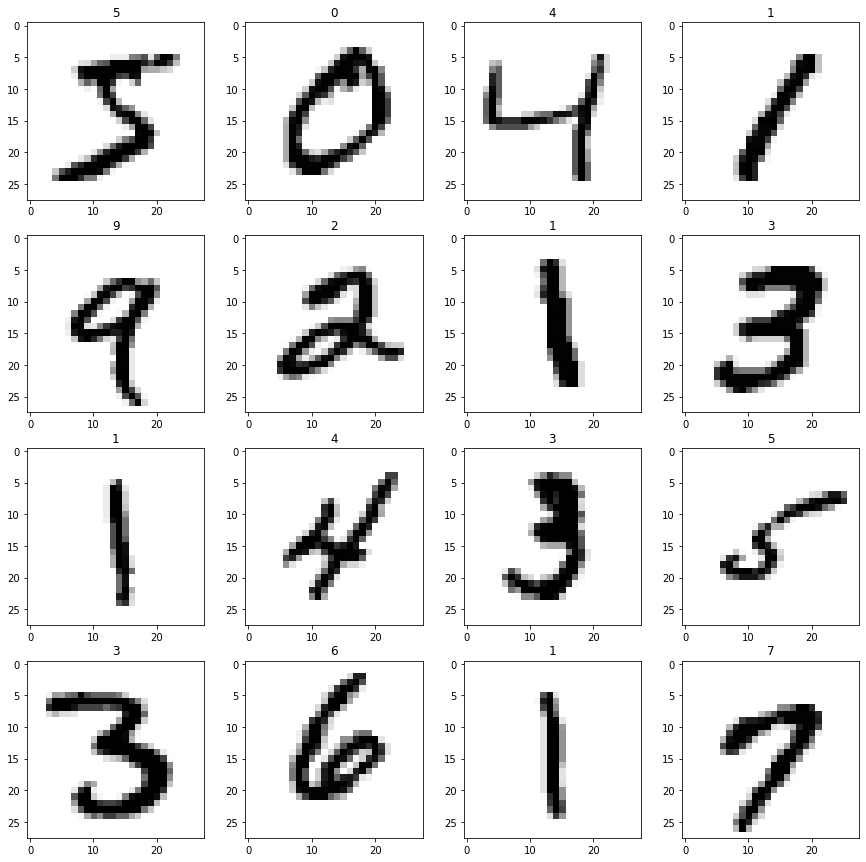

In [6]:
displayDigits(0)

### Preparing the Input Data

In [7]:
# Converting 2D image into 1D array.
x = data['data'][:8000,:]
y = np.zeros((len(x), 10), dtype = np.int8)
for element in range(0, len(x)):
    y[element, digits['target'][element]] = 1

print(x.shape)
print(y.shape)

(8000, 784)
(8000, 10)


In [8]:
# Splitting Data into Train and Test.
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = False)

### Building the Network and training the data

In [9]:
# Input layer with 28x28 nodes, 3 hidden layers with 512, 256, 128 nodes respectively and
# output layer with 10 nodes corresponding to the 10 classes of digits, from 0 to 9.

mlp = MLPClassifier(hidden_layer_sizes = (512, 256, 128), activation = 'logistic', alpha = 1e-4, solver = 'sgd',
                    random_state = 1, learning_rate_init = 0.008, max_iter = 300, verbose = True)

### Predicting with Test data

In [10]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 3.65107119
Iteration 2, loss = 3.24354712
Iteration 3, loss = 3.22679395
Iteration 4, loss = 3.21414329
Iteration 5, loss = 3.19724162
Iteration 6, loss = 3.17611734
Iteration 7, loss = 3.14642694
Iteration 8, loss = 3.10248437
Iteration 9, loss = 3.03916493
Iteration 10, loss = 2.94639446
Iteration 11, loss = 2.81844746
Iteration 12, loss = 2.66168496
Iteration 13, loss = 2.48095111
Iteration 14, loss = 2.28044963
Iteration 15, loss = 2.08126047
Iteration 16, loss = 1.90523523
Iteration 17, loss = 1.75880956
Iteration 18, loss = 1.64027579
Iteration 19, loss = 1.54160919
Iteration 20, loss = 1.45984904
Iteration 21, loss = 1.38755356
Iteration 22, loss = 1.32327279
Iteration 23, loss = 1.26291550
Iteration 24, loss = 1.20540959
Iteration 25, loss = 1.14948110
Iteration 26, loss = 1.09437591
Iteration 27, loss = 1.04446878
Iteration 28, loss = 0.98907636
Iteration 29, loss = 0.93232860
Iteration 30, loss = 0.88207885
Iteration 31, loss = 0.83088355
Iteration 32, los

Iteration 253, loss = 0.01882664
Iteration 254, loss = 0.01871648
Iteration 255, loss = 0.01860966
Iteration 256, loss = 0.01850876
Iteration 257, loss = 0.01839013
Iteration 258, loss = 0.01827442
Iteration 259, loss = 0.01817840
Iteration 260, loss = 0.01806679
Iteration 261, loss = 0.01796825
Iteration 262, loss = 0.01783827
Iteration 263, loss = 0.01775857
Iteration 264, loss = 0.01765893
Iteration 265, loss = 0.01755942
Iteration 266, loss = 0.01745306
Iteration 267, loss = 0.01736009
Iteration 268, loss = 0.01725461
Iteration 269, loss = 0.01717187
Iteration 270, loss = 0.01706713
Iteration 271, loss = 0.01694686
Iteration 272, loss = 0.01691838
Iteration 273, loss = 0.01677046
Iteration 274, loss = 0.01666890
Iteration 275, loss = 0.01658597
Iteration 276, loss = 0.01647593
Iteration 277, loss = 0.01638373
Iteration 278, loss = 0.01629522
Iteration 279, loss = 0.01620145
Iteration 280, loss = 0.01611756
Iteration 281, loss = 0.01603054
Iteration 282, loss = 0.01593624
Iteration 

MLPClassifier(activation='logistic', hidden_layer_sizes=(512, 256, 128),
              learning_rate_init=0.008, max_iter=300, random_state=1,
              solver='sgd', verbose=True)

Text(0.5, 1.0, 'Loss')

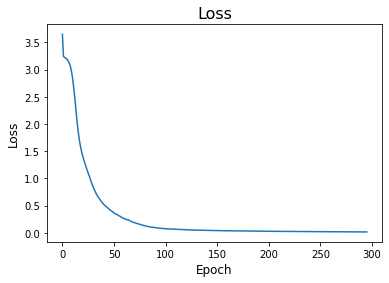

In [11]:
plt.plot(mlp.loss_curve_)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.title('Loss', fontsize = 16)

In [12]:
accuracy_score(y_test, mlp.predict(x_test))

0.909

### Importing the model into Pickle file

In [13]:
pickle.dump(mlp, open('model.pkl', 'wb'))